In [10]:
import keras
from keras.datasets import mnist
import tensorflow as tf

# Setup train and test splits
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# x_train = x_train.reshape(-1, 28, 28, 1)
# xtrain = tf.expand_dims(x_train, axis=-1)


print("Training label shape: ", y_train.shape) # (60000,) -- 60000 numbers (all 0-9)
print("First 5 training labels: ", y_train[:5]) # [5, 0, 4, 1, 9]

# Convert to "one-hot" vectors using the to_categorical function
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("First 5 training lables as one-hot encoded vectors:\n", y_train[:5])

# This is the one-hot version of: [5, 0, 4, 1, 9]
"""
[[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]
"""

Training label shape:  (60000,)
First 5 training labels:  [5 0 4 1 9]
First 5 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


2023-04-04 14:44:12.430934: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 47040000 exceeds 10% of free system memory.


'\n[[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]\n [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]\n [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]\n [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]\n [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]\n'

In [11]:
from keras.layers import Dense # Dense layers are "fully connected" layers
from keras.models import Sequential # Documentation: https://keras.io/models/sequential/

image_size = 784 # 28*28
num_classes = 10 # ten unique digits

model = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                25120     
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


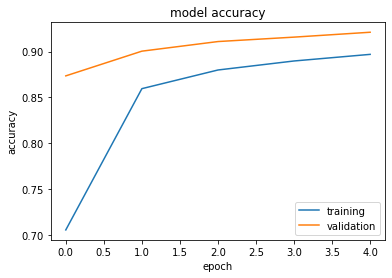

Test loss: 0.339
Test accuracy: 0.908


In [13]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Create the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, keras.utils.to_categorical(y_train), batch_size=128, epochs=5, verbose=False, validation_split=.1)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, keras.utils.to_categorical(y_test), verbose=False)

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

# Print the test loss and accuracy
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')


In [19]:
def create_dense(layer_sizes):
    image_size = x_train.shape[1] * x_train.shape[2]

    model = Sequential()
    model.add(Dense(layer_sizes[0], activation='sigmoid', input_shape=(image_size,)))

    for s in layer_sizes[1:]:
        model.add(Dense(units = s, activation = 'sigmoid'))

    model.add(Dense(units=num_classes, activation='softmax'))
    return model

def evaluate(model, batch_size=128, epochs=5):
    model.summary()
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)
    loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

In [ ]:
for layers in range(1, 5):
    model = create_dense([32] * layers)
    x_test = x_test.reshape(-1, 784)

    evaluate(model)